# Probabilities and Information Theory

## Introduction

**Probability Theory** is the study of probability and its interpretations through a set of rigorous mathematical formalism and axioms. It defines probability in terms of a probability space and probability measures between $0$ and $1$. In conjunction with Linear Algebra, Probability is one of the bases for Machine Learning.

## Fundamentals of Probability

In this section, the fundamental concepts of probability theory, **Random Experiments**, **Sets**, **Indepedence**, **Conditional Probability**, and **Baye's Rule** are discussed.

### Random Experiments

The **Probability** of an **Event** , defined as the chance of its realization,  is encoded as a **Positive Real Numeral** between $0$ and $1$. Formally speaking, we first define a **Probability Space** composed of the three following components: a **Sample Space** $\Omega$ representing all possible outcomes of an experiment, a set of possible **Events**, as well as a **Probability Function** $P$ measuring the chance of each event to occur.

```{note}
Note the $\Omega$ contains itself but also the empty set of events $\varnothing$.
```

The probability function is defined such as it always respect the following requirements:
- $P(\varnothing)=0$
- $P(\Omega)=1$
- $P(A \cup B)=P(A) + P(B)$ for two disjoint events $A$ and $B$
- $P(\overline{A}) = 1 - P(A)$ with $\overline{A}$ being the complement of the event $A$.

Let us illustrate those concepts by comparing three random experiments by **Monte Carlo Simulation** in conjunction with the **Theroy**.

#### Rowling Dices

Consider the following experiment where two independant and non-pipped six-sided dices are rolled, and we want to find the probability of the both dice being odd. The problem can be formalised as follow:
- $\Omega = \left \{ 1, \dots, 6  \right \}^2$
- $A = \left \{ (i, j) \; | \; i + j \; \text{is odd} \right \}$
- $P(B) = \frac{|B|}{|\Omega|}$ where $|.|$ denotes the number of element in the given set

The probability function is symmetric and can be resumed in the following table:

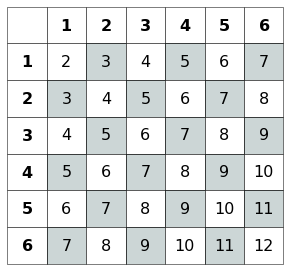

In [1]:
import matplotlib.pyplot as plt
plt.ion()
plt.style.use("fivethirtyeight")

omega = list(range(0, 6 + 1))
table = [[i + j for j in omega] for i in omega]
color = [[(1, 1, 1, 1) if e % 2 == 0 else (0, 0.2, 0.2, 0.2) for e in row] for row in table]
table = [[str(e) for e in row] for row in table]

bold = lambda x: f"$\\bf{x}$"

for i in range(0, 6 + 1):
    color[i][0] = color[0][i] = (1, 1, 1, 1)
    table[i][0] = table[0][i] = bold(i) if i > 0 else ""

cell_size = 0.3
size = cell_size * len(table)

fig = plt.figure(figsize=(size, size),  facecolor="white")
ax = fig.add_subplot(1, 1, 1)
ax.set_axis_off()

table = ax.table(cellText=table, cellColours=color, loc="center", cellLoc="center")
table.set_fontsize(16)
for pos, cell in table.get_celld().items():
    cell.set_height(cell_size)
    cell.set_width(cell_size)

fig.canvas.draw()

In [2]:
from myst_nb import glue
glue("experiment_dice_fig", fig, display=False)

```{glue:figure} experiment_dice_fig
:align: center
:name: "experiment-dice-fig"

Table representig the probabilities for each value of the two dices. The odd outcomes'cell are filled in gray.
```

Using the defined probability function, we can now compute the probability of the event $A$ as beign:

$$
P(A) = \frac{18}{36} = 0.5
$$

In [3]:
from itertools import product

import numpy as np
np.random.seed(42)


N, FACES = int(10e4), list(range(1, 6 + 1))
is_odd = lambda x: x % 2 != 0

th_p = np.sum([is_odd(i + j) for i, j in product(FACES, FACES)]) / (len(FACES) ** 2)
mc_p = np.sum([is_odd(np.random.choice(FACES) + np.random.choice(FACES)) for _ in range(N)]) / N

print(f"Theory                : P(A) = {th_p * 100:.2f}%")
print(f"Monte Carlo Estimation: P(A) = {mc_p * 100:.2f}%")

Theory                : P(A) = 50.00%
Monte Carlo Estimation: P(A) = 50.06%


#### Birthday Paradox

Consider a room full of people. If we ask the following question: What is the probability of having pairs of people with the same birthday date without the year? It is certain that with 366 people, you will have at least one pair. But what if we have fewer people? With 50 people, there is 50% chance for the existence of such a pair. This problem is referred to as the birthday paradox.

Let us formalized this problem as follow:
- $\Omega=\left \{ (x_i, x_j) \; \text{with} \; x_i, x_j \in \left \{ 1, \dots, 365 \right \} \right \}$, $|\Omega| = 365^n$
- $A = \left \{ (x_i, x_j) \; \text{whre} \; x_i=x_j \right \}$

Let us considere $\overline{A}$ which consists of all the tuples where $x_i \neq x_j$.

$$
|\overline{A}| = 365 \cdot 364 \cdot \dots \cdot (365 - n + 1) = \frac{365!}{(365 - n)!}
$$

As $\overline{A}$ is the complement for $A$:

$$
P(A) = 1 - P(\overline{A}) = 1 - \frac{|\overline{A}|}{|\Omega|} = 1 - \frac{365!}{(365 - n)! \cdot 365^n}
$$

In this sense, if we take a room of 50 people $P(A) \approx 97.04\%$.

In [11]:
import numpy as np
np.random.seed(42)


N = int(1e2)

factorial = lambda n: 1 if n == 0 else n * factorial(n - 1)
factorials = [factorial(i) for i in range(366)]

days = lambda n: np.random.randint(1, 365 + 1, size=n)
same = lambda a: np.max(np.unique(a, return_counts=True)[1]) > 1

theo = lambda n: 1 - (factorials[365] / (factorials[365 - n] * (365 ** n))) 
simu = lambda n: np.sum([same(days(n)) for _ in range(N)]) / N 

ns = list(range(60 + 1))
th_ps = np.array([0 if n == 0 else theo(n) for n in ns])
mc_ps = np.array([0 if n == 0 else simu(n) for n in ns])

total_error = np.abs(th_ps - mc_ps).mean()
print(f"Theory vs Monte Carlo Simulation Mean Error: {total_error:.2f}")

Theory vs Monte Carlo Simulation Mean Error: 0.03


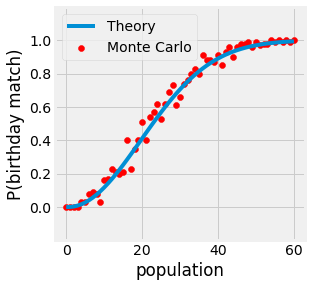

In [13]:
import matplotlib.pyplot as plt
plt.ion()
plt.style.use("fivethirtyeight")

fig = plt.figure(figsize=(4, 4),  facecolor="white")
ax = fig.add_subplot(1, 1, 1)

line, *_ = ax.plot(th_ps)
scat = ax.scatter(range(len(mc_ps)), mc_ps, color="r")
ax.set_ylim(-0.2, 1.2)
ax.set_yticks(np.arange(0, 1.2, 0.2))
ax.set_xlabel("population")
ax.set_ylabel("P(birthday match)")
ax.legend(handles=[line, scat], labels=["Theory", "Monte Carlo"])

fig.canvas.draw()

In [ ]:
from myst_nb import glue
glue("experiment_birthday_fig", fig, display=False)

```{glue:figure} experiment_birthday_fig
:align: center
:name: "experiment-birthday-fig"

Probability of a matching birthday in a room of n people.
```

#### Sampling with or without Replacement

### Sets
### Independence
### Conditional Probability
### Baye's Rule

## Probability Distributions
### Random Variables
### Moment Based Descriptors
### Discrete Distributions
### Continuous Distributions
### Joint Distributions

## Statistical Inference
### Random Sample
### Normal Sampling
### Central Limit Thorem
### Point Estimation
### Confidence Intervals
### Bayesian Statistics

## Hypothesis Testing
### Single Sample Hypothesis
### Two Sample Hypothesis
### Analysis of Variance
### Godness of Fit

## Information Theory
### Self-Information and Entropy
### Kullback-Leilber Divergence
### Jensen-Shanon Divergence
### Wasserstein Distance

## Applications
### Noise in Computer Graphics
### Probabilistic Dynamic Modeling
### Logistic Regression